# Cleaning

In [58]:
import pandas as pd
import random
import numpy as np

We begin by extracting, merging all the records, dropping lines that contain NaN values.

In [78]:
frames=[]
colnames=['date', 'time', 'code', 'value'] 
for i in range(1,71):
    if i<10:
        data="\data-0"+str(i)
    else:
        data="\data-"+str(i)
    
    file= ".\Diabetes-Data" + data
    frames.append(pd.read_csv(file,sep="\t",names=colnames))

# Creating concatenated dataset
data=pd.concat(frames)

print("The number of rows with NaN values is {}".format(sum([True for idx,row in data.iterrows() if any(row.isnull())])))

#Dropping these lines
data=data.dropna()
    
print("Here's a print of first rows of our merged dataset")
data.head()

The number of rows with NaN values is 66
Here's a print of first rows of our merged dataset


,date,time,code,value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [79]:
#Size of data
print(len(data))

29264


Now, we drop also files that contains incompatible Code Values as they are surely misleading.

In [80]:
codes=[33,34,35,48,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72]
columns_drop=[]


def clean_code(n):
    
    if n not in codes:
        return 0
    
    else:
        return n


data["code"]=data["code"].apply(clean_code)   

#Number of records with incompatible Code value

print("Number of records with incompatible Code value is {}".format(len(data[data["code"]==0]
)))

#Dropping these files
data=data[data["code"]!=0]


Number of records with incompatible Code value is 121


Now, as it is more intuitive that the variable Code is indeed Categorical rather than numerical, we create a one-hot encoding columns for this variables and we drop the main one. We also reset the index of our dataset.

In [81]:
new_col=pd.get_dummies(data.code, prefix='code') #Removing the last column because the sum should be 1, and hence removing correlations
data=pd.concat([data,new_col],axis=1)

data.drop(["code"],inplace=True, axis=1)

data=data.reset_index()

data.drop(["index"],inplace=True,axis=1)

At this stage, we also noticed that some lines are duplicated due the merge between different patient files. We remove these duplications.

In [82]:
print("The number of duplicates is {}".format(len(data)-len(data.drop_duplicates())))

#Dropping duplicates
data.drop_duplicates(keep=False,inplace=True) 

The number of duplicates is 1804


Now, it's time to handle the Time related features. We begin by transforming the type from object to datetime and then we define some functions that extracts Year, Month, Day, Hour and minutes. Lines with errors are dropped afterwards.

In [83]:
# Handling the column Date
def extract_year(s):
    return s.year
def extract_month(s):
    return s.month
def extract_day(s):
    return s.day

data['date'] = pd.to_datetime(data['date'] , dayfirst=True, errors='coerce')
data["day"]=data["date"].apply(extract_day)
data["month"]=data["date"].apply(extract_month)
data["year"]=data["date"].apply(extract_year)

data.drop(["date"],inplace=True,axis=1)

#Handling the column Time

data['time']=pd.to_datetime(data['time'], format="%H:%M", errors='coerce')

print("The number of rows with incorrect date value values is {}".format(sum([True for idx,row in data.iterrows() if any(row.isnull())])))

data= data.dropna()

data["hour"]=data["time"].dt.hour
data["minute"]=data["time"].dt.minute

data.drop(["time"], inplace=True, axis=1)

print("The number of rows with incorrect Time value values is {}".format(sum([True for idx,row in data.iterrows() if any(row.isnull())])))

data=data.dropna()


#Just to make sure everything is now numeric and no duplicates
data= data.apply(pd.to_numeric, errors='coerce')

data=data.dropna()
data.drop_duplicates(keep=False,inplace=True) 
data

The number of rows with incorrect date value values is 12
The number of rows with incorrect Time value values is 0


,value,code_33,code_34,code_35,code_48,code_57,code_58,code_59,code_60,code_61,...,code_68,code_69,code_70,code_71,code_72,day,month,year,hour,minute
0,100.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,21.0,4.0,1991.0,9,9
1,9.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.0,4.0,1991.0,9,9
2,13.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,21.0,4.0,1991.0,9,9
3,119.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.0,4.0,1991.0,17,8
4,7.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.0,4.0,1991.0,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.0,9.0,1989.0,8,0
29139,7.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5.0,9.0,1989.0,8,0
29140,7.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5.0,10.0,1989.0,8,0
29141,7.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5.0,11.0,1989.0,8,0


In [84]:
print("The mean of Blood Glucose in our dataset is {}".format(np.mean(data["value"])))

The mean of Blood Glucose in our dataset is 81.17082235419043


# Modeling

After cleaning the dataset, we now train Machine Learning models to make the prediction of Blood Glucose levels. Here, we use the LightGBM model (Using LightGBM Python Package, to run this one has to launch in terminal the command : $\textbf{pip install lightgbm}.$ LightGbm is a Microsoft-developed implementation for $\textbf{The Gradient Boosting Machine}$

We also use the $\textbf{Random Forest}$ model.



In [85]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Modeling
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor

# Evaluation of the model
from sklearn.model_selection import KFold



## Train/Test data

We begin by dividing our dataset into Train/Test sets. The test set is 30% of the dataset.

In [101]:
from sklearn.model_selection import train_test_split

X=data.drop(["value"],axis=1)

y= data["value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
# Convert to numpy array for splitting in cross validation
features = np.array(X_train)
test_features = np.array(X_test)
labels = np.array(y_train[:])
test_labels=y_test[:]

In [103]:
print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)


Train shape:  (17798, 25)
Test shape:  (7629, 25)


In [104]:
# Model with default hyperparameters
model_boost = lgb.LGBMRegressor()
model_rf=  RandomForestRegressor()


In [107]:
print(model_boost)
print(model_rf)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


For the LighGBM model
MSE is 2713.7968.
RMSE is 52.0941.
r2 score is 0.6877.
MAE is 30.1853.
Training time is 0.1403 seconds
For the Random forest model
MSE is 3071.8743.
RMSE is 55.4245.
r2 score is 0.6465.
MAE is 31.0459.
Training time is 4.9712 seconds


Text(0,0.5,'Predicted Blood Glucose')

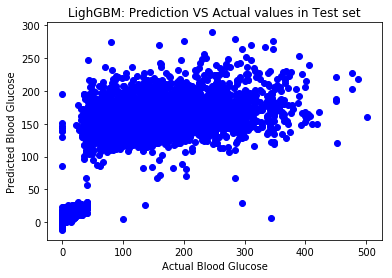

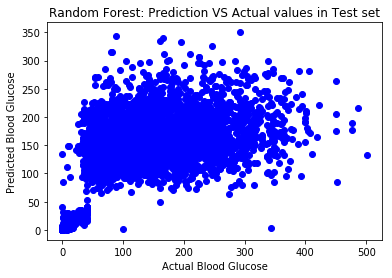

In [108]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from timeit import default_timer as timer

def train_model(model):
    start = timer()
    model.fit(features, labels)
    train_time = timer() - start

    predictions = model.predict(test_features)
    MSE = mean_squared_error(test_labels, predictions)
    r2= r2_score(test_labels, predictions)
    MAE= mean_absolute_error(test_labels, predictions)
    
    print('MSE is {:.4f}.'.format((MSE)))
    print('RMSE is {:.4f}.'.format(np.sqrt(MSE)))
    print('r2 score is {:.4f}.'.format(r2))
    print('MAE is {:.4f}.'.format(MAE))

    print('Training time is {:.4f} seconds'.format(train_time))
    
    return predictions
    

    

print("For the LighGBM model")
predictions1=train_model(model_boost)
plt.figure()
plt.plot(test_labels, predictions1, 'bo')
plt.title("LighGBM: Prediction VS Actual values in Test set")
plt.xlabel("Actual Blood Glucose")
plt.ylabel("Predicted Blood Glucose")

print("For the Random forest model")
predictions2=train_model(model_rf)

plt.figure()
plt.plot(test_labels, predictions2, 'bo')
plt.title("Random Forest: Prediction VS Actual values in Test set")
plt.xlabel("Actual Blood Glucose")
plt.ylabel("Predicted Blood Glucose")
